<a href="https://colab.research.google.com/github/seyyidahmeddjellouli/RNN_course/blob/main/rnn_basics_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
import numpy as np

def build_and_train_network(lstm_sizes, vocab_size, embed_size, epochs, batch_size, learning_rate, keep_prob, train_x, val_x, train_y, val_y):
    tf.compat.v1.reset_default_graph()

    inputs = tf.compat.v1.placeholder(tf.int32, [None, None])
    labels = tf.compat.v1.placeholder(tf.int32, [None])
    keep_prob_ = tf.compat.v1.placeholder(tf.float32)

    # Create embeddings
    embed = tf.keras.layers.Embedding(vocab_size, embed_size)(inputs)

    # Build LSTM layers
    cells = [tf.keras.layers.LSTMCell(size) for size in lstm_sizes]
    stacked_lstm = tf.keras.layers.StackedRNNCells(cells)
    rnn_layer = tf.keras.layers.RNN(stacked_lstm, return_sequences=True)
    lstm_outputs = rnn_layer(embed)

    # Fully connected layer
    predictions = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(lstm_outputs[:, -1, :])

    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(labels, predictions))
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.cast(tf.round(predictions), tf.int32), labels), tf.float32))

    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())

        for epoch in range(epochs):
            for batch_x, batch_y in batches(train_x, train_y, batch_size):
                feed_dict = {inputs: batch_x, labels: batch_y, keep_prob_: keep_prob}
                sess.run(optimizer, feed_dict=feed_dict)

            val_acc = sess.run(accuracy, feed_dict={inputs: val_x, labels: val_y, keep_prob_: 1.0})
            print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_acc:.4f}")

def batches(x, y, batch_size):
    for i in range(0, len(x), batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

# Example usage
lstm_sizes = [128, 64]
vocab_size = 10000
embed_size = 300
epochs = 10
batch_size = 64
learning_rate = 0.001
keep_prob = 0.5

# Generate random training and validation data
num_train_samples = 1000
num_val_samples = 200
seq_length = 50

train_x = np.random.randint(0, vocab_size, size=(num_train_samples, seq_length))
val_x = np.random.randint(0, vocab_size, size=(num_val_samples, seq_length))
train_y = np.random.randint(0, 2, size=num_train_samples)
val_y = np.random.randint(0, 2, size=num_val_samples)

build_and_train_network(lstm_sizes, vocab_size, embed_size, epochs, batch_size,
                        learning_rate, keep_prob, train_x, val_x, train_y, val_y)


ValueError: ignored

In [42]:
import tensorflow as tf
import numpy as np

def build_and_train_network(lstm_sizes, vocab_size, embed_size, epochs, batch_size, learning_rate, keep_prob, train_x, val_x, train_y, val_y):
    tf.compat.v1.reset_default_graph()

    inputs = tf.compat.v1.placeholder(tf.int32, [None, None])
    labels = tf.compat.v1.placeholder(tf.float32, [None, 1])  # Change the shape to match logits
    keep_prob_ = tf.compat.v1.placeholder(tf.float32)

    # Create embeddings
    embed = tf.keras.layers.Embedding(vocab_size, embed_size)(inputs)

    # Build LSTM layers
    cells = [tf.keras.layers.LSTMCell(size) for size in lstm_sizes]
    stacked_lstm = tf.keras.layers.StackedRNNCells(cells)
    rnn_layer = tf.keras.layers.RNN(stacked_lstm, return_sequences=True)
    lstm_outputs = rnn_layer(embed)

    # Fully connected layer
    predictions = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(lstm_outputs[:, -1, :])

    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(labels, predictions))
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.cast(tf.round(predictions), tf.float32), labels), tf.float32))

    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())

        for epoch in range(epochs):
            for batch_x, batch_y in batches(train_x, train_y, batch_size):
                feed_dict = {inputs: batch_x, labels: batch_y, keep_prob_: keep_prob}
                sess.run(optimizer, feed_dict=feed_dict)

            val_acc = sess.run(accuracy, feed_dict={inputs: val_x, labels: val_y, keep_prob_: 1.0})
            print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_acc:.4f}")

def batches(x, y, batch_size):
    for i in range(0, len(x), batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

# Example usage
lstm_sizes = [128, 64]
vocab_size = 10000
embed_size = 300
epochs = 10
batch_size = 64
learning_rate = 0.001
keep_prob = 0.5

# Generate random training and validation data
num_train_samples = 1000
num_val_samples = 200
seq_length = 50

train_x = np.random.randint(0, vocab_size, size=(num_train_samples, seq_length))
val_x = np.random.randint(0, vocab_size, size=(num_val_samples, seq_length))
train_y = np.random.randint(0, 2, size=(num_train_samples, 1))
val_y = np.random.randint(0, 2, size=(num_val_samples, 1))

build_and_train_network(lstm_sizes, vocab_size, embed_size, epochs, batch_size,
                        learning_rate, keep_prob, train_x, val_x, train_y, val_y)


Epoch 1/10, Validation Accuracy: 0.5100
Epoch 2/10, Validation Accuracy: 0.5150
Epoch 3/10, Validation Accuracy: 0.4800
Epoch 4/10, Validation Accuracy: 0.5300
Epoch 5/10, Validation Accuracy: 0.5200
Epoch 6/10, Validation Accuracy: 0.5000
Epoch 7/10, Validation Accuracy: 0.5200
Epoch 8/10, Validation Accuracy: 0.5150
Epoch 9/10, Validation Accuracy: 0.5200
Epoch 10/10, Validation Accuracy: 0.5250


In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Generate some example data
num_samples = 1000
sequence_length = 20
vocab_size = 10000
embedding_size = 100

train_x = np.random.randint(0, vocab_size, size=(num_samples, sequence_length))
train_y = np.random.randint(0, 2, size=(num_samples,))

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2)


Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - ETA: 0s - loss: 0.6940 - acc: 0.4863

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


800/800 [==============================] - 2s 3ms/sample - loss: 0.6940 - acc: 0.4863 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 2/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.4360 - acc: 0.9450 - val_loss: 0.8665 - val_acc: 0.5200
Epoch 3/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.0220 - acc: 0.9950 - val_loss: 1.4801 - val_acc: 0.5100
Epoch 4/10
800/800 [==============================] - 3s 3ms/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 2.3775 - val_acc: 0.5300
Epoch 5/10
800/800 [==============================] - 2s 3ms/sample - loss: 5.2287e-04 - acc: 1.0000 - val_loss: 2.5403 - val_acc: 0.5200
Epoch 6/10
800/800 [==============================] - 2s 2ms/sample - loss: 3.5947e-04 - acc: 1.0000 - val_loss: 2.6417 - val_acc: 0.5200
Epoch 7/10
800/800 [==============================] - 2s 2ms/sample - loss: 2.7787e-04 - acc: 1.0000 - val_loss: 2.7296 - val_acc: 0.5200
Epoch 8/10
800/800 [==============================] - 2s 2ms/

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 2s 3ms/sample - loss: 0.6898 - acc: 0.5487 - val_loss: 0.6923 - val_acc: 0.5250
Epoch 2/10
800/800 [==============================] - 4s 5ms/sample - loss: 0.4369 - acc: 0.7437 - val_loss: 0.8917 - val_acc: 0.4900
Epoch 3/10
800/800 [==============================] - 4s 5ms/sample - loss: 0.0243 - acc: 0.9987 - val_loss: 1.8404 - val_acc: 0.5500
Epoch 4/10
800/800 [==============================] - 2s 3ms/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 2.1523 - val_acc: 0.5750
Epoch 5/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 2.3398 - val_acc: 0.5650
Epoch 6/10
800/800 [==============================] - 2s 2ms/sample - loss: 7.3317e-04 - acc: 1.0000 - val_loss: 2.4654 - val_acc: 0.5650
Epoch 7/10
800/800 [==============================] - 2s 2ms/sample - loss: 5.3305e-04 - acc: 1.0000 - val_loss: 2.5673 - val_acc: 0.5700
Epoch 8/

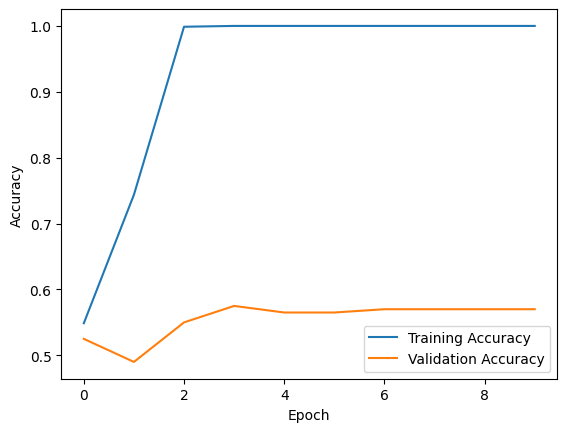

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Generate some example data
num_samples = 1000
sequence_length = 20
vocab_size = 10000
embedding_size = 100

train_x = np.random.randint(0, vocab_size, size=(num_samples, sequence_length))
train_y = np.random.randint(0, 2, size=(num_samples,))

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2)

# Plot training and validation accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'acc' in history.history:
    plt.plot(history.history['acc'], label='Training Accuracy')

if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
if 'val_acc' in history.history:
    plt.plot(history.history['val_acc'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [48]:
# Print example data
print("Example Data:")
print(train_x)
print("Example Labels:")
print(train_y)

Example Data:
[[6898 3079 1456 ... 1594 6989 2215]
 [1388 4486 8665 ... 5412 4459 6028]
 [9897 6249 8519 ... 4691 2852 5389]
 ...
 [3129 7293 2939 ... 7970 7963 9910]
 [9593 9216 6246 ... 5151 5750 2456]
 [6425 9007 5630 ... 4952 4834  226]]
Example Labels:
[1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0
 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 